# ProjectPOP: Initial Data Analysis

For the data and other code, see the <a href="https://github.com/BenCoullNeveu/ProjectPOP/tree/main">Github repository</a>.

## Table of contents
1. [Imported Libraries](#libraries)
2. [Importing File of Interest](#file_read)
3. [First Spectrogram](#spectrogram)
4. [Convolved Spectrogram Demonstration](#convolution_demo)
5. [3D Spectrogram](#3d_spec)
6. [3D Animated Spectrogram](#3d_spec_anim)


<a id="libraries"></a> 
### 1. Imported Libraries

In [1]:
from scipy import signal
from scipy.io.wavfile import read
import numpy as np

from IPython.display import Audio

import matplotlib.pyplot as plt
%matplotlib inline 

<a id="file_read"></a>
### 2. Importing File of Interest

In [2]:
FILENAME = 'Recordings/Recording (4).wav'

sample_rate, samples = read(FILENAME)
# if samples.shape[1] >= 2:
#     samples = samples[:, 1]
freqs, times, spectrogram = signal.spectrogram(samples[:,1], sample_rate, nperseg=200)
# freqs, times, spectrogram = signal.stft(samples, sample_rate, nperseg=100, window='hann')

Audio(samples[:,1].T, rate=sample_rate)

<a id="spectrogram"></a>
### 3. First Spectrogram

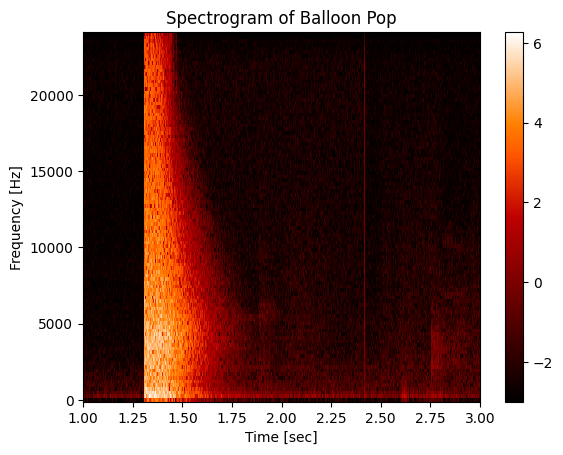

In [3]:
STRETCH_FACTOR = 1e-3 # increase value to increase contrast

plt.pcolormesh(times, freqs, np.log10(np.abs(spectrogram + STRETCH_FACTOR)), cmap='gist_heat')
plt.colorbar()

plt.xlim(1, 3)

plt.title("Spectrogram of Balloon Pop")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.savefig('Frequency Analysis/Frequency analysis.png', dpi=300, bbox_inches='tight')
plt.show()



<a id="concolution_demo"></a>
### 4. Convolved Spectrogram

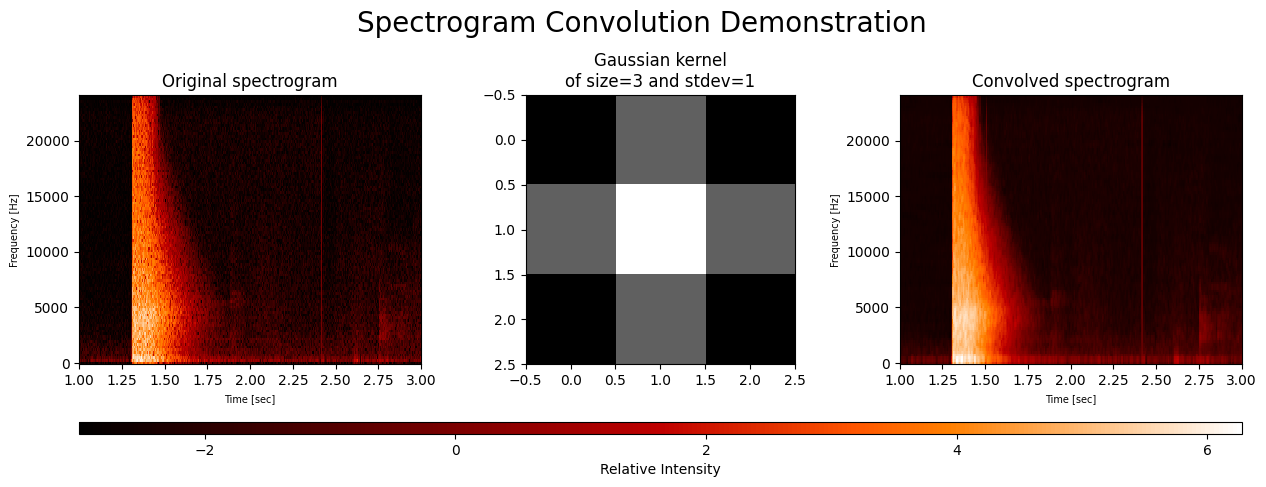

In [4]:
NUM_POINTS = 3
STDEV = 1

CONVOLVEED_STRETCH = 3e-2

FONTSIZE = 12
LABEL_FONTSIZE = 7

# Convolution
kernel = np.outer(signal.windows.gaussian(NUM_POINTS, STDEV),
                  signal.windows.gaussian(NUM_POINTS, STDEV))

convolved = signal.fftconvolve(spectrogram, kernel, mode='same')

# Plotting
fig, axs = plt.subplots(1,3, figsize=(15,5))
(ax_original, ax_kernel, ax_convolved) = axs

im = ax_original.pcolormesh(times, freqs, np.log10(np.abs(spectrogram + STRETCH_FACTOR)), cmap='gist_heat')
ax_original.set_title('Original spectrogram', fontsize=FONTSIZE)
ax_original.set_xlabel('Time [sec]', fontsize=LABEL_FONTSIZE)
ax_original.set_ylabel('Frequency [Hz]', fontsize=LABEL_FONTSIZE)
ax_original.set_xlim(1, 3)

ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title(f'Gaussian kernel\nof size={NUM_POINTS} and stdev={STDEV}', fontsize=FONTSIZE)

ax_convolved.pcolormesh(times, freqs, np.log(np.abs(convolved + CONVOLVEED_STRETCH)), cmap='gist_heat')
ax_convolved.set_title('Convolved spectrogram', fontsize=FONTSIZE)
ax_convolved.set_xlabel('Time [sec]', fontsize=LABEL_FONTSIZE)
ax_convolved.set_ylabel('Frequency [Hz]', fontsize=LABEL_FONTSIZE)
ax_convolved.set_xlim(1, 3)

fig.suptitle('Spectrogram Convolution Demonstration', fontsize=20, y=1.05)
plt.colorbar(im, ax=axs, orientation='horizontal', aspect=100, label='Relative Intensity')

plt.savefig('Frequency Analysis/Spectrogram convolution demonstration.png', bbox_inches='tight', dpi=300)
plt.show()

<a id="3d_spec"></a>
### 5. 3D Spectrogram

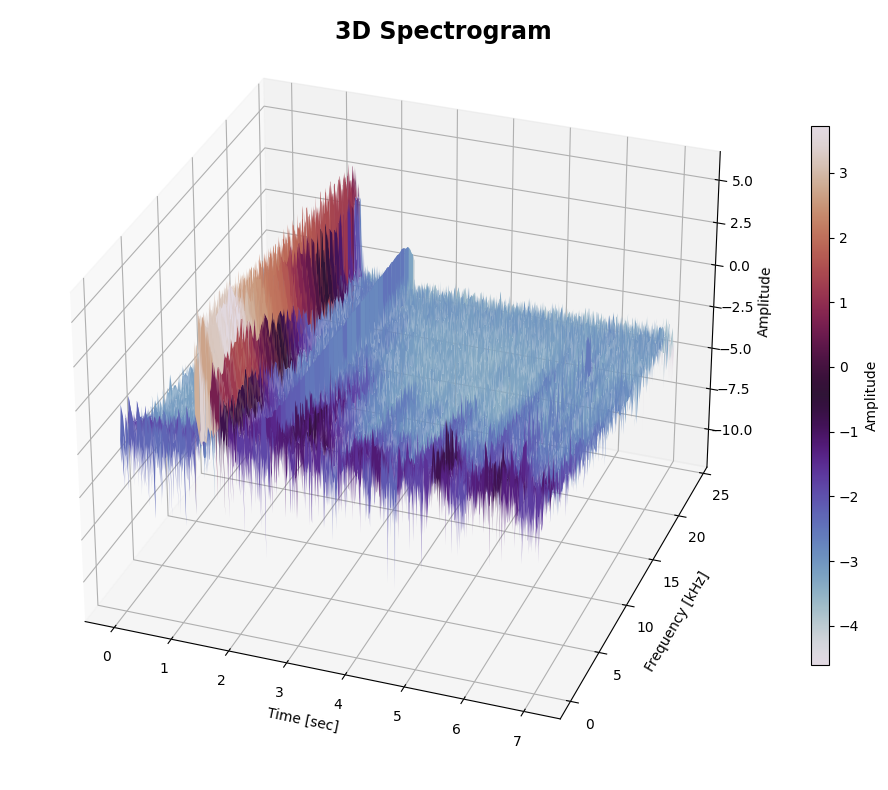

In [5]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(projection='3d')

ax.view_init(30, 290, 0)
img = ax.plot_surface(times[None, :], freqs[:,None]/1000, np.log10(spectrogram), cmap='twilight')

plt.colorbar(img, ax=ax, aspect=30, shrink=.7, pad=.02, label='Amplitude')

fig.suptitle('3D Spectrogram', x=.6, y=.87, fontsize=17, weight=1000)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [kHz]')
ax.set_zlabel('Amplitude')

plt.savefig('Frequency Analysis/3D Spectrogram.png', bbox_inches='tight', dpi=300)
plt.show()

<a id="3d_spec_anim"></a>
### 6. 3D Animated Spectrogram 

MovieWriter ffmpeg unavailable; using Pillow instead.


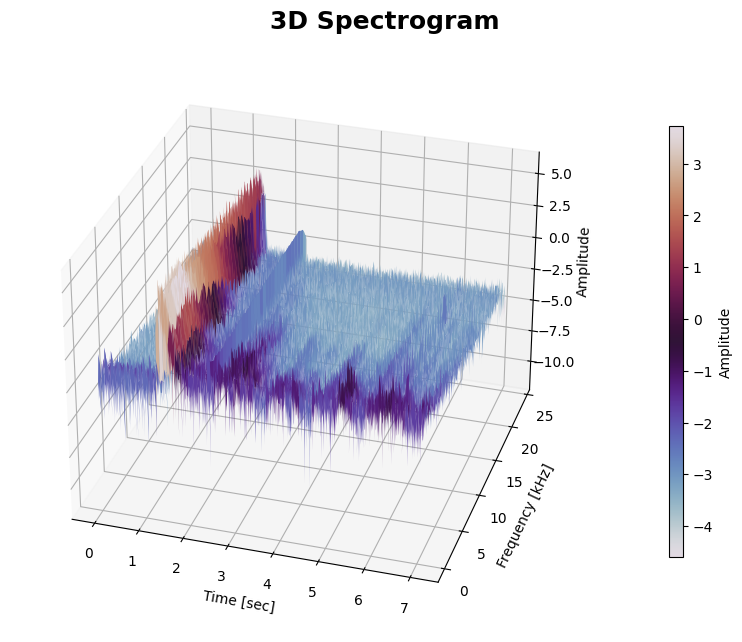

In [6]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(projection='3d')

ax.view_init(30, 290, 0)
img = ax.plot_surface(times[None, :], freqs[:,None]/1000, np.log10(spectrogram), cmap='twilight')

plt.colorbar(img, ax=ax, aspect=30, shrink=.7, pad=.1, label='Amplitude')

fig.suptitle('3D Spectrogram', x=.5, y=.91, fontsize=18, weight=1000)
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [kHz]')
ax.set_zlabel('Amplitude')


def update(angle):
    ax.view_init(30,290+3*angle,0)
    return fig,

ani = FuncAnimation(fig, update, frames=120,  blit=True, repeat=False)

ani.save('Frequency Analysis/3D_Spectrogram_rotating.gif', writer='ffmpeg',fps=15)
plt.show()